# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
# a base de dados já não estava mais disponível no site como antes, então fiz o download e importei a  seguinte
url = './processed.cleveland.data'

In [4]:
# criando a df com as variáveis escolhias
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# criando variável flag de 'num' 0= saudável e 1 = doente

df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [8]:
# não há dados nulos
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64

In [10]:
# não há entradas duplicadas
df.duplicated().sum()

0

In [11]:
df.info()
#verificando tipagem dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


> Variável ``flag_doente``: 0= saudável e 1 = doente

### 1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [14]:
#aplicanod a bivariada com sexo e alterando as dummie para categórica pra facilitar a leitura
gen = {1: 'male', 0: 'female'}
stat = {0:'saudavel', 1:'doente'}

tab = pd.crosstab(df.sex.map(gen), df.flag_doente.map(stat), margins= True)
tab

flag_doente,doente,saudavel,All
sex,,,
female,25,72,97
male,114,92,206
All,139,164,303


In [15]:
tab['probabilidade'] = tab['saudavel']/tab['All']
tab

flag_doente,doente,saudavel,All,probabilidade
sex,,,,
female,25,72,97,0.742268
male,114,92,206,0.446602
All,139,164,303,0.541254


In [16]:
tab['chance'] = tab['saudavel']/tab['doente']
tab

flag_doente,doente,saudavel,All,probabilidade,chance
sex,,,,,
female,25,72,97,0.742268,2.880000
male,114,92,206,0.446602,0.807018
All,139,164,303,0.541254,1.179856


In [17]:
tab['RC_vs_male'] = tab['chance']/tab.loc['male','chance']
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_male
sex,,,,,,
female,25,72,97,0.742268,2.880000,3.568696
male,114,92,206,0.446602,0.807018,1.000000
All,139,164,303,0.541254,1.179856,1.461996


In [18]:
tab['log_chance'] = np.log(tab['chance'])
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_male,log_chance
sex,,,,,,,
female,25,72,97,0.742268,2.880000,3.568696,1.057790
male,114,92,206,0.446602,0.807018,1.000000,-0.214410
All,139,164,303,0.541254,1.179856,1.461996,0.165392


In [20]:
tab['log_RC_vs_male'] = np.log(tab['RC_vs_male'])
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_male,log_chance,log_RC_vs_male
sex,,,,,,,,
female,25,72,1.272200,0.742268,2.880000,3.568696,1.057790,1.272200
male,114,92,0.000000,0.446602,0.807018,1.000000,-0.214410,0.000000
All,139,164,0.379802,0.541254,1.179856,1.461996,0.165392,0.379802


### 2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [95]:
df.age.sort_values().unique()

array([29., 34., 35., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
       60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 74.,
       76., 77.])

In [99]:
# identificando os quantis
pd.qcut(df.age, q=5).sort_values().unique()

[(28.999, 45.0], (45.0, 53.0], (53.0, 58.0], (58.0, 62.0], (62.0, 77.0]]
Categories (5, interval[float64, right]): [(28.999, 45.0] < (45.0, 53.0] < (53.0, 58.0] < (58.0, 62.0] < (62.0, 77.0]]

In [100]:
# usei as dstribuições dos quartis como labels.
df['age_qcut'] = pd.qcut(df.age, 
                         q=5,
                         labels = ['28-45', '45-53', '53-58', '58-62', '62-77']
                        )
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_qcut
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,62-77
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,62-77
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,62-77
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,28-45
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,28-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,28-45
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,62-77
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,53-58
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,53-58


In [109]:
# criando a bivariada com a age categorizada
tab = pd.crosstab(df.age_qcut, df.flag_doente.map(stat), margins= True)
tab

flag_doente,doente,saudavel,All
age_qcut,,,
28-45,16,47,63
45-53,22,42,64
53-58,39,32,71
58-62,32,13,45
62-77,30,30,60
All,139,164,303


In [110]:
# add probabilidade
tab['probabilidade'] = tab.saudavel/tab.All
tab

flag_doente,doente,saudavel,All,probabilidade
age_qcut,,,,
28-45,16,47,63,0.746032
45-53,22,42,64,0.656250
53-58,39,32,71,0.450704
58-62,32,13,45,0.288889
62-77,30,30,60,0.500000
All,139,164,303,0.541254


In [111]:
# add odds
tab['chance'] = tab.saudavel/tab.doente
tab

flag_doente,doente,saudavel,All,probabilidade,chance
age_qcut,,,,,
28-45,16,47,63,0.746032,2.937500
45-53,22,42,64,0.656250,1.909091
53-58,39,32,71,0.450704,0.820513
58-62,32,13,45,0.288889,0.406250
62-77,30,30,60,0.500000,1.000000
All,139,164,303,0.541254,1.179856


In [112]:
tab['RC_vs_28-45'] = tab['chance']/tab.loc['28-45','chance']
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_28-45
age_qcut,,,,,,
28-45,16,47,63,0.746032,2.937500,1.000000
45-53,22,42,64,0.656250,1.909091,0.649903
53-58,39,32,71,0.450704,0.820513,0.279324
58-62,32,13,45,0.288889,0.406250,0.138298
62-77,30,30,60,0.500000,1.000000,0.340426
All,139,164,303,0.541254,1.179856,0.401653


In [113]:
tab['log_chance'] = np.log(tab.chance)
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_28-45,log_chance
age_qcut,,,,,,,
28-45,16,47,63,0.746032,2.937500,1.000000,1.077559
45-53,22,42,64,0.656250,1.909091,0.649903,0.646627
53-58,39,32,71,0.450704,0.820513,0.279324,-0.197826
58-62,32,13,45,0.288889,0.406250,0.138298,-0.900787
62-77,30,30,60,0.500000,1.000000,0.340426,0.000000
All,139,164,303,0.541254,1.179856,0.401653,0.165392


In [115]:
tab['log_RC_vs_28-45'] = np.log(tab['RC_vs_28-45'])
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_28-45,log_chance,log_RC_vs_28-45
age_qcut,,,,,,,,
28-45,16,47,63,0.746032,2.937500,1.000000,1.077559,0.000000
45-53,22,42,64,0.656250,1.909091,0.649903,0.646627,-0.430932
53-58,39,32,71,0.450704,0.820513,0.279324,-0.197826,-1.275385
58-62,32,13,45,0.288889,0.406250,0.138298,-0.900787,-1.978345
62-77,30,30,60,0.500000,1.000000,0.340426,0.000000,-1.077559
All,139,164,303,0.541254,1.179856,0.401653,0.165392,-0.912166


In [136]:
tab['media_age'] = round(df.groupby('age_qcut')['age'].mean(),2)
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_28-45,log_chance,log_RC_vs_28-45,media_age
age_qcut,,,,,,,,,
28-45,16,47,63,0.746032,2.937500,1.000000,1.077559,0.000000,41.22
45-53,22,42,64,0.656250,1.909091,0.649903,0.646627,-0.430932,50.00
53-58,39,32,71,0.450704,0.820513,0.279324,-0.197826,-1.275385,56.21
58-62,32,13,45,0.288889,0.406250,0.138298,-0.900787,-1.978345,60.36
62-77,30,30,60,0.500000,1.000000,0.340426,0.000000,-1.077559,66.52
All,139,164,303,0.541254,1.179856,0.401653,0.165392,-0.912166,NaN


In [153]:
tab['age_qcut'] = tab.index


In [150]:
df['age_qcut'].unique().sort_values()

['28-45', '45-53', '53-58', '58-62', '62-77']
Categories (5, object): ['28-45' < '45-53' < '53-58' < '58-62' < '62-77']

### 3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [154]:
tab

flag_doente,doente,saudavel,All,probabilidade,chance,RC_vs_28-45,log_chance,log_RC_vs_28-45,media_age,age_qcut
age_qcut,,,,,,,,,,
28-45,16,47,63,0.746032,2.937500,1.000000,1.077559,0.000000,41.22,28-45
45-53,22,42,64,0.656250,1.909091,0.649903,0.646627,-0.430932,50.00,45-53
53-58,39,32,71,0.450704,0.820513,0.279324,-0.197826,-1.275385,56.21,53-58
58-62,32,13,45,0.288889,0.406250,0.138298,-0.900787,-1.978345,60.36,58-62
62-77,30,30,60,0.500000,1.000000,0.340426,0.000000,-1.077559,66.52,62-77
All,139,164,303,0.541254,1.179856,0.401653,0.165392,-0.912166,NaN,All


<Axes: ylabel='age_qcut'>

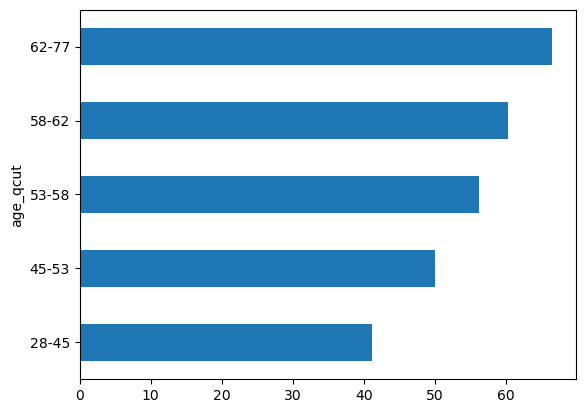

In [135]:
round(df.groupby('age_qcut')['age'].mean(),2).plot.barh()

<Axes: ylabel='chance'>

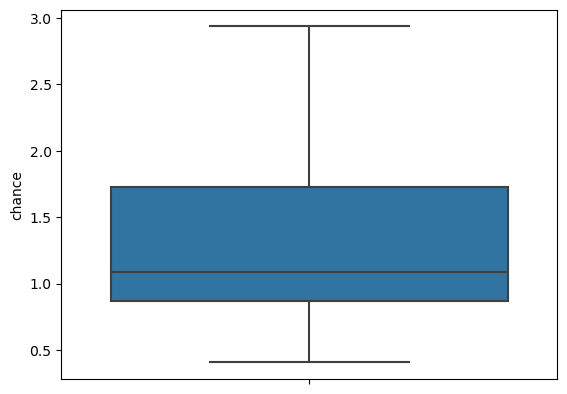

In [118]:
sns.boxplot(y="chance", data=tab)

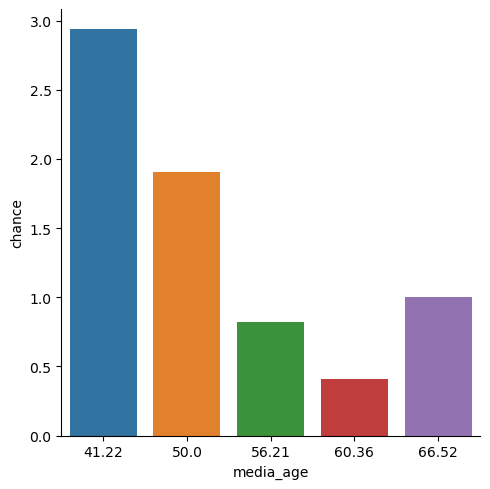

In [138]:
sns.catplot(x='media_age'
            , y='chance'
            , kind='bar'
            , data=tab
           )

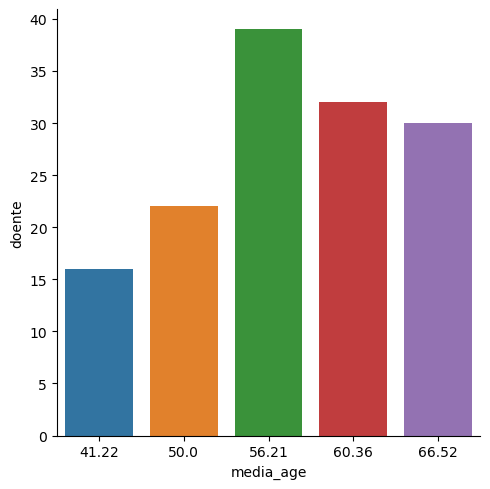

In [139]:
sns.catplot(x='media_age'
            , y='doente'
            , kind='bar'
            , data=tab
           )

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0.28888888888888886'),
  Text(1, 0, '0.4507042253521127'),
  Text(2, 0, '0.5'),
  Text(3, 0, '0.5412541254125413'),
  Text(4, 0, '0.65625'),
  Text(5, 0, '0.746031746031746')])

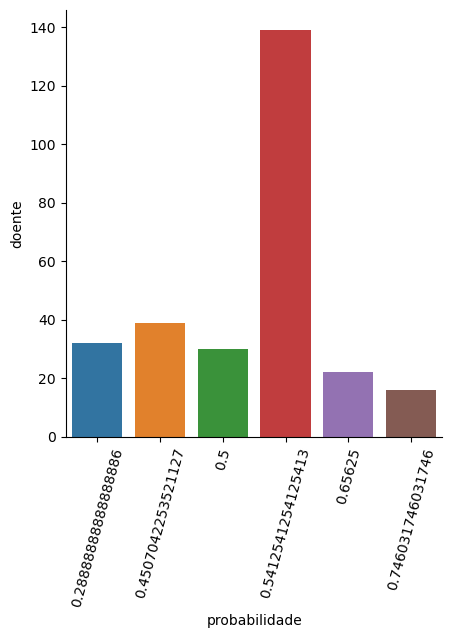

In [146]:
sns.catplot(x='probabilidade'
            , y='doente'
            , kind='bar'
            , data=tab
           )
plt.xticks(rotation=75)

<Axes: xlabel='age_qcut', ylabel='doente'>

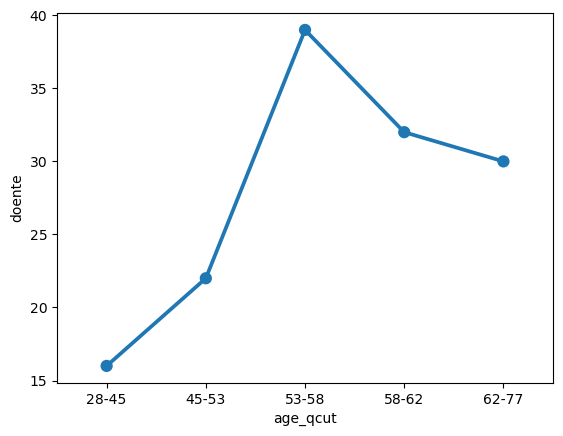

In [159]:
sns.pointplot(x=tab.iloc[0:5,-1]
              , y="doente"
              , data=tab
              , dodge=True
              )

<Axes: xlabel='age_qcut', ylabel='saudavel'>

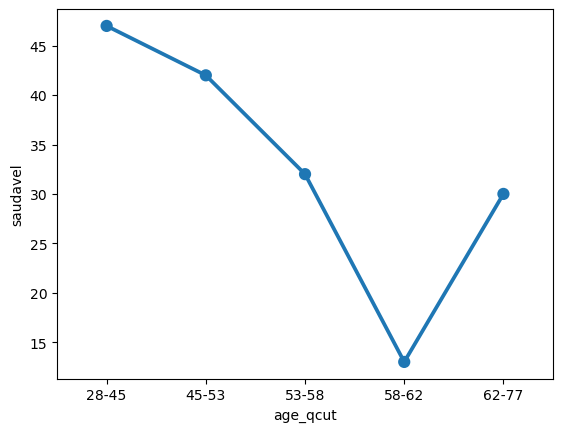

In [160]:
sns.pointplot(x=tab.iloc[0:5,-1]
              , y="saudavel"
              , data=tab
              , dodge=True
              )